In [1]:
# name: Siyu(Jemma) Tang
# project: Bank Customer Churn Prediction

import pandas as pd
import numpy as np

In [2]:
# firstly, read the data frame (10000 rows * 14 columns). 
churn = pd.read_csv("bank.data.csv")
churn

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
#check the unique number of each attritube and notice that "RowNumber" and "CustomerId" might not provide information
churn.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [4]:
# check the number of null value of each column and luckily, this data set does not contain any null value
# Thus, it is unnecessary to delete any missing value
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
# Since we want to analyze the churn probability so our target variable is the last column "Exited"
y =  churn["Exited"]
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [6]:
# then I want to check the proportion of the exited customer
prop = sum(y)/y.shape[0]
prop

0.2037

In [7]:
# Exploratory Data Analysis
# understand numerical(continuous/discrete) features
churn[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].describe()

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,1.530200,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,0.581654,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,1.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,1.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,1.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,2.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,4.000000,250898.090000,199992.480000


In [8]:
# check these features distribution 
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

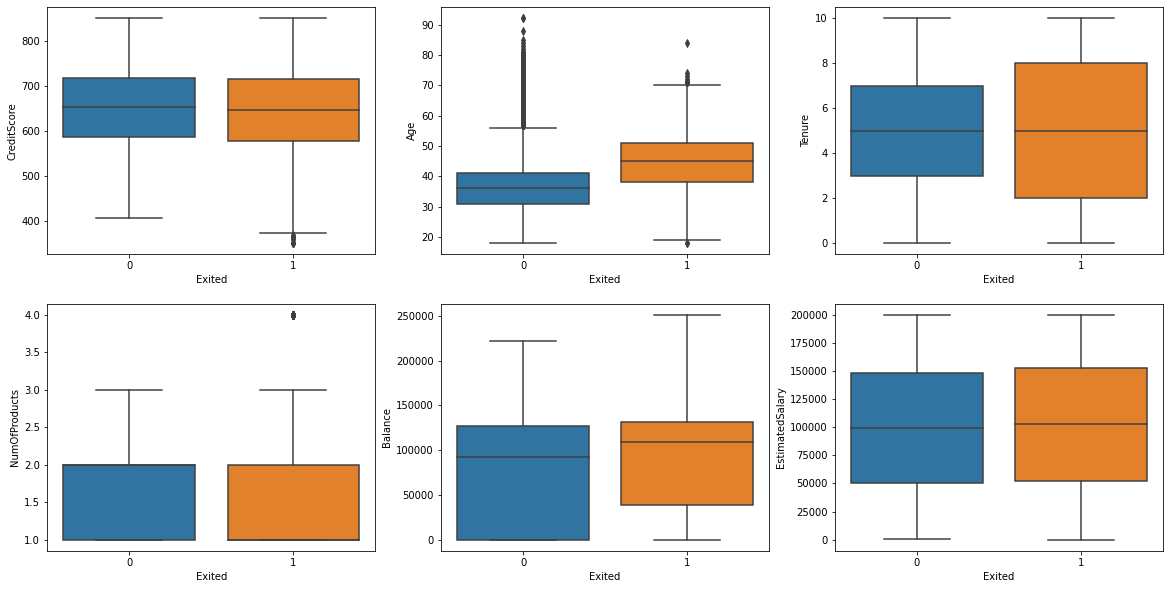

In [9]:
# boxplot for numerical feature
_,axss = plt.subplots(2,3, figsize=[20,10])
sns.boxplot(x='Exited', y ='CreditScore', data=churn, ax=axss[0][0])
sns.boxplot(x='Exited', y = 'Age', data=churn, ax=axss[0][1])
sns.boxplot(x='Exited', y ='Tenure', data=churn, ax=axss[0][2])
sns.boxplot(x='Exited', y ='NumOfProducts', data=churn, ax=axss[1][0])
sns.boxplot(x='Exited', y ='Balance', data=churn, ax=axss[1][1])
sns.boxplot(x='Exited', y ='EstimatedSalary', data=churn, ax=axss[1][2])

In [10]:
# From above boxplots, I note the following:
# 1. Credit score, number of products and estimated salary has no big influence to exited
# 2. Elder people or people with too longer/shorter tenure are much easier to exit
# 3. Many customers who have not exited yet tend to have zero or little balance(inactive customer)

<AxesSubplot:xlabel='Exited', ylabel='count'>

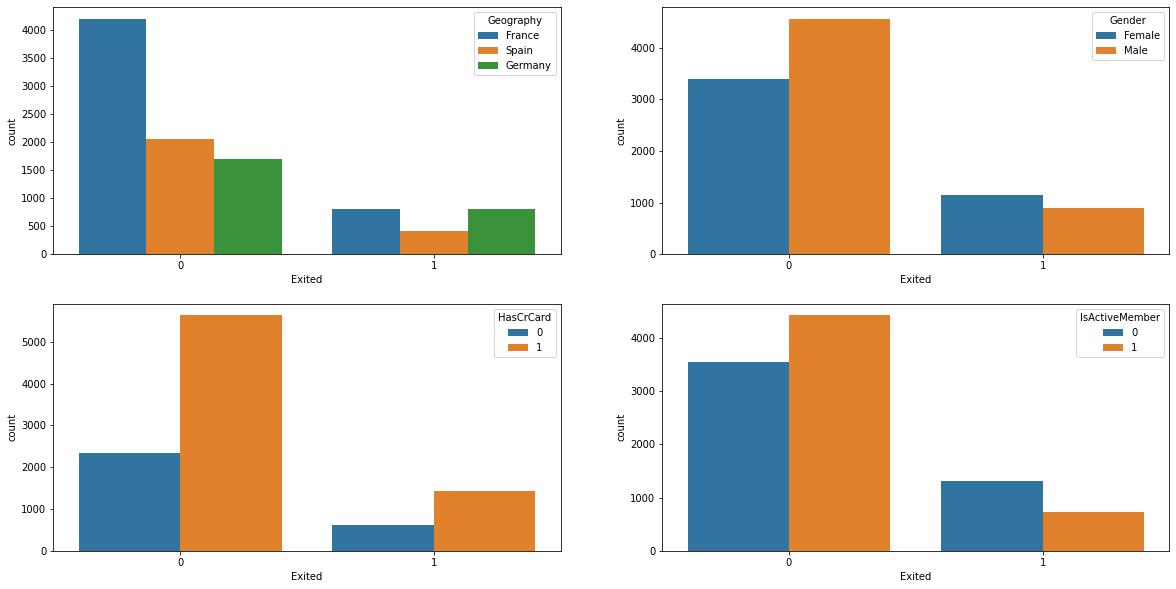

In [11]:
# understand the relationships between categorical features and y("exited")
_,axss = plt.subplots(2,2, figsize=[20,10])
sns.countplot(x='Exited', hue='Geography', data=churn, ax=axss[0][0])
sns.countplot(x='Exited', hue='Gender', data=churn, ax=axss[0][1])
sns.countplot(x='Exited', hue='HasCrCard', data=churn, ax=axss[1][0])
sns.countplot(x='Exited', hue='IsActiveMember', data=churn, ax=axss[1][1])

In [12]:
# From above countplots, I note the following:
# 1. Bank customers are mostly from France but the largest exit proportion is Germany customers
# 2. Female customers quit more than male
# 3. It is hard to see the relationship between having credit card and exiting
# 4. Inactive member tend to have high probability to exit

In [13]:
# check if there is significant correlationship between numerical features
corr_score = churn[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].corr()
corr_score

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.012238,0.006268,-0.001384
Age,-0.003965,1.000000,-0.009997,-0.030680,0.028308,-0.007201
Tenure,0.000842,-0.009997,1.000000,0.013444,-0.012254,0.007784
NumOfProducts,0.012238,-0.030680,0.013444,1.000000,-0.304180,0.014204
Balance,0.006268,0.028308,-0.012254,-0.304180,1.000000,0.012797
EstimatedSalary,-0.001384,-0.007201,0.007784,0.014204,0.012797,1.000000


<AxesSubplot:>

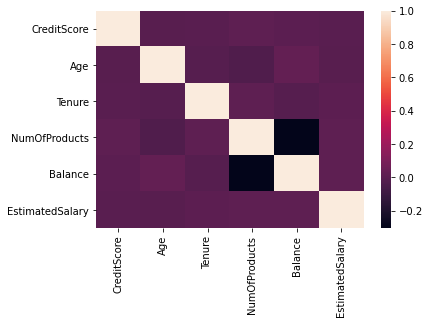

In [14]:
# using heatmap to see the correlationship more explicitly
sns.heatmap(corr_score)

In [15]:
# From above, the largest absolute value of corr_score is 0.3 
# the conclusion is that there does not exist any correlationship between these features

In [16]:
# do ordinal encoding to "gender"
# turn all female to True, male to False
churn['Gender'] = churn['Gender'] == "Female"
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,True,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,True,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,True,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,True,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,True,43,2,125510.82,1,1,1,79084.10,0


In [17]:
# do one-hot encoding to "geography"
churn = pd.get_dummies(churn, columns=['Geography'])
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,True,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,15647311,Hill,608,True,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,True,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,15701354,Boni,699,True,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,Mitchell,850,True,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [18]:
# drop some columns
# these features are useless to analyze since they are too specific for a customer 
to_drop = ['RowNumber','CustomerId','Surname','Exited']
X = churn.drop(to_drop, axis=1)
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,True,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,True,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,True,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,True,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,True,43,2,125510.82,1,1,1,79084.10,0,0,1


In [19]:
# split the data set into training and testing
from sklearn import model_selection

In [20]:
# 75% for training, 25% for testing and use random state to control the random data set
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, stratify = y, random_state=1)

In [21]:
print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 7500 observation with 12 features
test data has 2500 observation with 12 features


In [22]:
# use standardization to scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
# fit models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression

# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

In [24]:
# Train the logistic regression model
classifier_logistic.fit(X_train, y_train)

LogisticRegression()

In [25]:
# Using the logicitic model to predict test data
classifier_logistic.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
# Calculate the accuracy of test data
classifier_logistic.score(X_test, y_test)

0.808

In [27]:
# Use 5-fold Cross Validation to get the accuracy for different models
model_names = ['Logistic Regression','KNN','Random Forest']
model_list = [classifier_logistic, classifier_KNN, classifier_RF]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    print(cv_score)
    print('Model accuracy of ' + model_names[count] + ' is ' + str(cv_score.mean()))
    count += 1

[0.81933333 0.80666667 0.80666667 0.80933333 0.82      ]
Model accuracy of Logistic Regression is 0.8124
[0.82533333 0.836      0.814      0.824      0.832     ]
Model accuracy of KNN is 0.8262666666666666
[0.88       0.86733333 0.85333333 0.85666667 0.86733333]
Model accuracy of Random Forest is 0.8649333333333334


In [28]:
# use grid search to find optimal hyperparameter
from sklearn.model_selection import GridSearchCV

In [29]:
# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

In [30]:
# Logistic Regression Regularization

In [31]:
# Possible hyperparamter options for Logistic Regression Regularization
# Penalty is choosed from L1 or L2
# C is the lambda value(weight) for L1 and L2

# ('l1', 1) ('l1', 5) ('l1', 10) ('l2', 1) ('l2', 5) ('l2', 10)
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(0.01, 1, 5, 10) 
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (0.01, 1, 5, 10), 'penalty': ('l1', 'l2')})

In [32]:
# the best hyperparameter combination
print_grid_search_metrics(Grid_LR)

Best score: 0.8124
Best parameters set:
C:1
penalty:l2


In [33]:
# best model
best_LR_model = Grid_LR.best_estimator_

In [34]:
# K-Nearest Neighbors

In [35]:
# Possible hyperparamter options for KNN
# Choose k
parameters = {
    'n_neighbors':[1,3,5,7,9]
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]})

In [36]:
# best k
print_grid_search_metrics(Grid_KNN)

Best score: 0.8322666666666667
Best parameters set:
n_neighbors:9


In [37]:
best_KNN_model = Grid_KNN.best_estimator_

In [38]:
# Random Forest

In [39]:
# Possible hyperparamter options for Random Forest
# Choose the number of trees
parameters = {
    'n_estimators' : [40,60,80]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [40, 60, 80]})

In [40]:
# best number of tress
print_grid_search_metrics(Grid_RF)

Best score: 0.8641333333333334
Best parameters set:
n_estimators:80


In [41]:
# best random forest
best_RF_model = Grid_RF.best_estimator_

In [42]:
best_RF_model

RandomForestClassifier(n_estimators=80)

In [43]:
# According to the 5_fold Cross Validation, three models have similar accuracy scores (just a little bit nuances)
# Random forest's accuracy is highest 0.864
# Also, I use grid search to find out the optimal hyperparameter for each model so once I can confirm model selection 
# I can also select the relative best hyperparameter
# However, it is not enough do model selection just relying on model accuracy
# Thus, I need to calculate others, e.g. precision, recall, f-1 score, ROC-AUC score

In [44]:
# Model evaluation by confusion matrix
# Precision, Recall, F-1

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall, [[tn, fp],[]]
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    f1 = 2 / (1/recall + 1/precision + 0.0)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))
    print ("f1 is: " + str(f1))
    print ()

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)

In [46]:
# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
    ("K nearest neighbor", confusion_matrix(y_test, best_KNN_model.predict(X_test)))
]

draw_confusion_matrices(confusion_matrices)

Random Forest
Accuracy is: 0.8624
precision is: 0.7835051546391752
recall is: 0.44793713163064836
f1 is: 0.57

Logistic Regression
Accuracy is: 0.808
precision is: 0.5857988165680473
recall is: 0.1944990176817289
f1 is: 0.2920353982300885

K nearest neighbor
Accuracy is: 0.8336
precision is: 0.6837944664031621
recall is: 0.33988212180746563
f1 is: 0.4540682414698163



In [47]:
#Model evaluation by ROC and AUC

In [48]:
#ROC for random forest

In [49]:
from sklearn.metrics import roc_curve
from sklearn import metrics

# Use predict_proba to get the probability results of Random Forest
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresh = roc_curve(y_test, y_pred_rf)

In [50]:
best_RF_model.predict_proba(X_test)

array([[0.7625, 0.2375],
       [0.95  , 0.05  ],
       [0.8   , 0.2   ],
       ...,
       [0.925 , 0.075 ],
       [0.9   , 0.1   ],
       [0.925 , 0.075 ]])

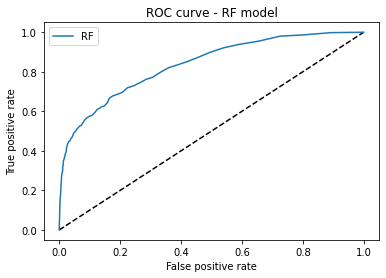

In [51]:
# ROC curve of Random Forest result
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [52]:
from sklearn import metrics

# AUC score
rf_auc = metrics.auc(fpr_rf,tpr_rf)
rf_auc

0.8359888654149961

In [53]:
#ROC of KNN

In [54]:
y_pred_knn = best_KNN_model.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, thresh = roc_curve(y_test, y_pred_knn)

In [55]:
best_KNN_model.predict_proba(X_test)

array([[0.88888889, 0.11111111],
       [1.        , 0.        ],
       [0.88888889, 0.11111111],
       ...,
       [0.77777778, 0.22222222],
       [1.        , 0.        ],
       [1.        , 0.        ]])

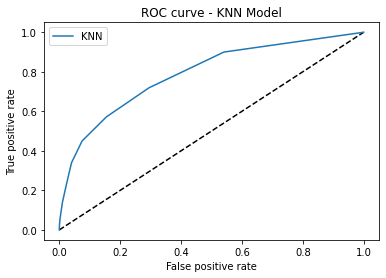

In [57]:
# ROC curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - KNN Model')
plt.legend(loc='best')
plt.show()

In [58]:
# AUC score
knn_auc = metrics.auc(fpr_knn,tpr_knn)
knn_auc

0.7882519471215756

In [59]:
# ROC of Logistic Regression

In [60]:
# Use predict_proba to get the probability results of Logistic Regression
y_pred_lr = best_LR_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresh = roc_curve(y_test, y_pred_lr)

In [61]:
best_LR_model.predict_proba(X_test)

array([[0.82440541, 0.17559459],
       [0.93201435, 0.06798565],
       [0.85485771, 0.14514229],
       ...,
       [0.71400625, 0.28599375],
       [0.89297649, 0.10702351],
       [0.85539214, 0.14460786]])

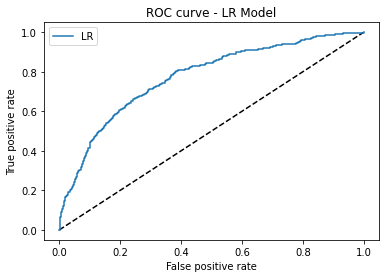

In [62]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

In [63]:
# AUC score
lr_auc = metrics.auc(fpr_lr,tpr_lr)
lr_auc

0.7722314264879581

In [64]:
model_auc = {"Random Forest": rf_auc, "KNN": knn_auc, "Logistic Regression": lr_auc}
model_auc

{'Random Forest': 0.8359888654149961,
 'KNN': 0.7882519471215756,
 'Logistic Regression': 0.7722314264879581}

In [65]:
#From confusion matrix and ROC-AUC, it is very clear that Random Forest has the highest precision and auc scores

In [66]:
X_with_corr = X.copy()
X_with_corr['SalaryInRMB'] = X['EstimatedSalary'] * 6.91
X_with_corr.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,SalaryInRMB
0,619,True,42,2,0.00,1,1,1,101348.88,1,0,0,700320.7608
1,608,True,41,1,83807.86,1,0,1,112542.58,0,0,1,777669.2278
2,502,True,42,8,159660.80,3,1,0,113931.57,1,0,0,787267.1487
3,699,True,39,1,0.00,2,0,0,93826.63,1,0,0,648342.0133
4,850,True,43,2,125510.82,1,1,1,79084.10,0,0,1,546471.1310


In [67]:
# add L1 regularization to logistic regression
# check the coef for feature selection
scaler = StandardScaler()
X_l1 = scaler.fit_transform(X_with_corr)
LRmodel_l1 = LogisticRegression(penalty="l1", C = 0.1, solver='liblinear')
LRmodel_l1.fit(X_l1, y)

indices = np.argsort(abs(LRmodel_l1.coef_[0]))[::-1]

print ("Logistic Regression (L1) Coefficients")
for ind in range(X_with_corr.shape[1]):
    print ("{0} : {1}".format(X_with_corr.columns[indices[ind]],round(LRmodel_l1.coef_[0][indices[ind]], 4)))

Logistic Regression (L1) Coefficients
Age : 0.7495
IsActiveMember : -0.524
Geography_Germany : 0.3171
Gender : 0.2541
Balance : 0.159
CreditScore : -0.0569
NumOfProducts : -0.0529
Tenure : -0.0384
EstimatedSalary : 0.0199
HasCrCard : -0.013
Geography_France : -0.0122
SalaryInRMB : 0.0003
Geography_Spain : 0.0


In [68]:
# add L2 regularization to logistic regression
# check the coef for feature selection
np.random.seed()
scaler = StandardScaler()
X_l2 = scaler.fit_transform(X_with_corr)
LRmodel_l2 = LogisticRegression(penalty="l2", C = 0.1, solver='liblinear', random_state=42)
LRmodel_l2.fit(X_l2, y)
LRmodel_l2.coef_[0]

indices = np.argsort(abs(LRmodel_l2.coef_[0]))[::-1]

print ("Logistic Regression (L2) Coefficients")
for ind in range(X_with_corr.shape[1]):
    print ("{0} : {1}".format(X_with_corr.columns[indices[ind]],round(LRmodel_l2.coef_[0][indices[ind]], 4)))

Logistic Regression (L2) Coefficients
Age : 0.751
IsActiveMember : -0.5272
Gender : 0.2591
Geography_Germany : 0.2279
Balance : 0.162
Geography_France : -0.1207
Geography_Spain : -0.089
CreditScore : -0.0637
NumOfProducts : -0.0586
Tenure : -0.0452
HasCrCard : -0.0199
EstimatedSalary : 0.0137
SalaryInRMB : 0.0137


In [69]:
# check feature importance of random forest for feature selection
forest = RandomForestClassifier()
forest.fit(X, y)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X.shape[1]):
    print ("{0} : {1}".format(X.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
Age : 0.2379
EstimatedSalary : 0.1462
CreditScore : 0.1436
Balance : 0.1419
NumOfProducts : 0.1295
Tenure : 0.0819
IsActiveMember : 0.0418
Geography_Germany : 0.0206
Gender : 0.0193
HasCrCard : 0.0182
Geography_France : 0.0096
Geography_Spain : 0.0094
